In [1]:
import networkx as nx
import pandas as pd
%matplotlib inline

In [2]:
M=nx.read_gml("polblogs.gml")
#M.node


In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

G

### 1.  Create a nice looking graph of the political blog network

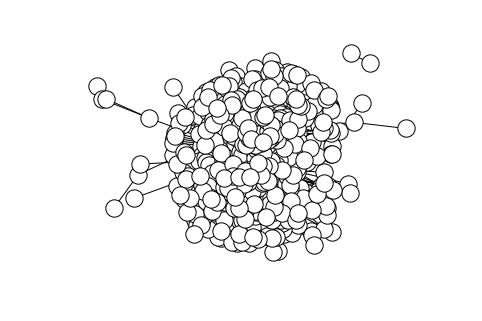

In [52]:
pos=nx.spring_layout(G, iterations=500, k=.999)

nx.draw(G, pos, node_color='w')

In [5]:
#Eiganvalue Centrality
centrality=nx.eigenvector_centrality(G, max_iter=1000)


In [15]:
#centrality

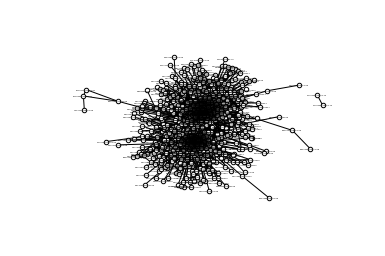

In [51]:
from matplotlib import pyplot as plt
pos=nx.spring_layout(G, k=.1)
nx.draw_networkx_labels(G,pos,centrality,font_size=2)
nx.draw_networkx_nodes(G,pos,node_size=20, alpha=.99, node_color='w')
nx.draw_networkx_edges(G, pos)
plt.axis('off')
plt.show()

In [18]:
#for key, value in centrality.iteritems():
#   centrality[key]= round(value ,2)

### 2.  What are the 10 most influential blogs?

In [19]:
from heapq import nlargest
from operator import itemgetter

for name, score in nlargest(10, centrality.iteritems(), key=itemgetter(1)):
    print name, score

atrios.blogspot.com 0.194807979366
dailykos.com 0.160897402052
washingtonmonthly.com 0.146539242598
digbysblog.blogspot.com 0.142643692217
bodyandsoul.typepad.com 0.141134891743
liberaloasis.com 0.139523715711
tbogg.blogspot.com 0.137036416998
corrente.blogspot.com 0.129417592741
talkingpointsmemo.com 0.127005197808
dneiwert.blogspot.com 0.122375646925


### 3.  What are the 10 least influential blogs?



In [20]:
from heapq import nsmallest
from operator import itemgetter

for name, score in nsmallest(10, centrality.iteritems(), key=itemgetter(1)):
    print name, score

thelonedem.com 1.77632510976e-72
digital-democrat.blogspot.com 1.77632510976e-72
americanworldview.tripod.com/weltansblog 7.49154063892e-09
quimundus.modblog.com 6.68292997501e-08
batr.org/commentary.html 6.79551761155e-07
batr.net 6.79632559493e-07
democratvoice.org 1.02333882041e-06
quimundus.squarespace.com 6.06174121887e-06
massachusetts-liberal.com 9.48336523573e-06
thingsasitis.net 1.17362496507e-05


### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)